In [106]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [107]:
import torch
import torch.nn as nn
import icnn
import numpy as np
from matplotlib import pyplot as plt
import torch.optim as optim

## Generate data

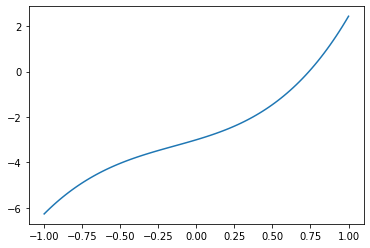

In [110]:
x = torch.linspace(-1, 1, 100, dtype=torch.double)
y = 2* x ** 3 + 2 * np.exp(x) - 5
_, = plt.plot(x, y)

## Train regressor

In [111]:
num_epoch = 15000
model = icnn.ICNN(1, [50, 50, 50, 1])
lr = 0.001
lossfn = nn.MSELoss(reduction='sum')
verbose = True

In [112]:
optimizer = optim.Adam(model.parameters(), lr=lr)
scheduler = optim.lr_scheduler.CosineAnnealingLR(
          optimizer, num_epoch)
for epoch in range(num_epoch):
    model.zero_grad()
    yhat = model.forward(x.unsqueeze(0))
    loss = lossfn(yhat, y.unsqueeze(1))
    if(verbose and epoch % 1000 == 0):
        print('Epoch: {} \t Loss: {}'.format(epoch+1, loss.item()))
    loss.backward()
    torch.nn.utils.clip_grad_norm_(model.parameters(), 10)
    optimizer.step()
    scheduler.step()

Epoch: 1 	 Loss: 363221027538.5688
Epoch: 1001 	 Loss: 23.241246904353346
Epoch: 2001 	 Loss: 7.65363997418474
Epoch: 3001 	 Loss: 6.14857475415622
Epoch: 4001 	 Loss: 5.293382913170078
Epoch: 5001 	 Loss: 4.39894292807297
Epoch: 6001 	 Loss: 4.021061003773473
Epoch: 7001 	 Loss: 3.6827023627586675
Epoch: 8001 	 Loss: 3.416711897485434
Epoch: 9001 	 Loss: 3.3034568008549954
Epoch: 10001 	 Loss: 3.2033525403295204
Epoch: 11001 	 Loss: 3.13271896500283
Epoch: 12001 	 Loss: 3.0962151072915782
Epoch: 13001 	 Loss: 3.058350214719593
Epoch: 14001 	 Loss: 3.04165312958509


## Plot result

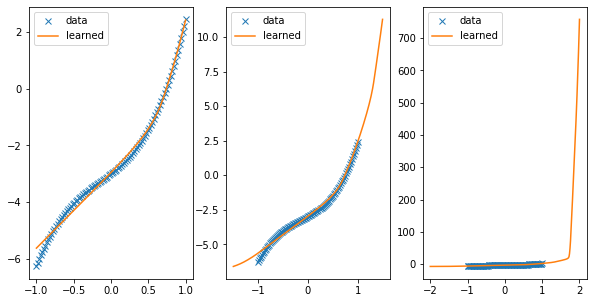

In [113]:
lim = [1, 1.5, 2]

fig = plt.figure(figsize=(10,5))
for i, l in enumerate(lim):
    plt.subplot(1,len(lim),i+1)
    # Plot data
    _, = plt.plot(x, y, 'x', label='data')
    # Plot interpolation
    xtest = torch.linspace(-l, l, 300, dtype=torch.double)
    yhat = model.forward(xtest.unsqueeze(0)).detach()
    plt.plot(xtest, yhat, label='learned')
    _ = plt.legend()